In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Lire le fichier CSV
datatrain = pd.read_csv("./train.csv")
# Afficher les premières lignes du DataFrame
print(datatrain.head())
# Afficher la taille du DataFrame
print(f"Le DataFrame contient {datatrain.shape[0]} lignes et {datatrain.shape[1]} colonnes.")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Le

In [2]:
# Lire le fichier CSV
datatest = pd.read_csv("./test.csv")
# Afficher les premières lignes du DataFrame
print(datatest.head())
# Afficher la taille du DataFrame
print(f"Le DataFrame contient {datatest.shape[0]} lignes et {datatest.shape[1]} colonnes.")

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Le DataFrame contient 418 lignes et 11 colonnes.


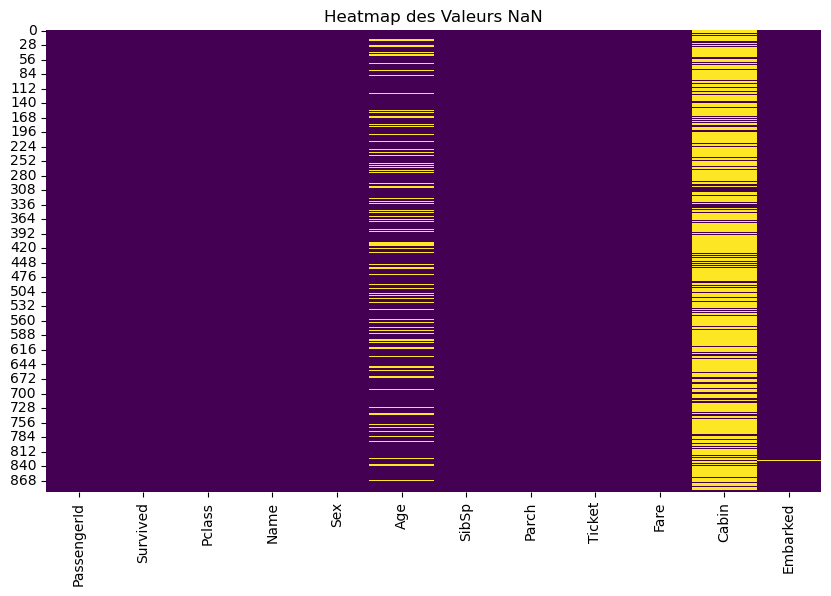

In [3]:
# Tracer la heatmap des valeurs NaN
plt.figure(figsize=(10, 6))
sns.heatmap(datatrain.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des Valeurs NaN')
plt.show()


In [4]:
# Calculer le pourcentage de valeurs NaN pour la colonne 'Age'
age_nan_percentage = datatrain['Age'].isnull().mean() * 100
print(f"Pourcentage de valeurs NaN pour 'Age' : {age_nan_percentage:.2f}%")

Pourcentage de valeurs NaN pour 'Age' : 19.87%


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


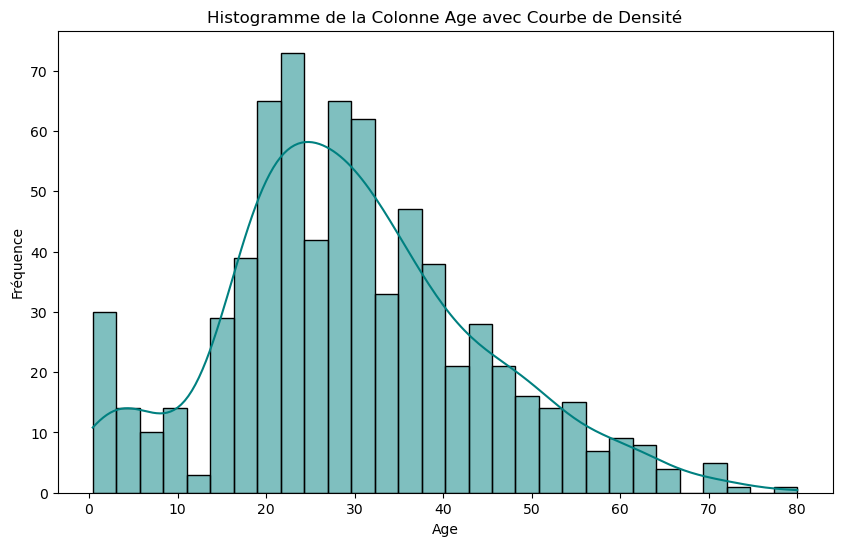

In [5]:
# Tracer l'histogramme de la colonne 'Age' avec une courbe de densité
plt.figure(figsize=(10, 6))
sns.histplot(datatrain['Age'], kde=True, color='teal', bins=30, edgecolor='black')
plt.title('Histogramme de la Colonne Age avec Courbe de Densité')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.show()

In [6]:
# Calculer la médiane de la colonne 'Age'
median_age = datatrain['Age'].median()
print(f"Médiane de la colonne 'Age' : {median_age}")

# Calculer la moyenne de la colonne 'Age'
mean_age = datatrain['Age'].mean()
print(f"Moyenne de la colonne 'Age' : {mean_age}")

Médiane de la colonne 'Age' : 28.0
Moyenne de la colonne 'Age' : 29.69911764705882


In [7]:
#print the cabin % of NaN values

In [8]:
cabin_nan_percentage = datatrain['Cabin'].isnull().mean() * 100
print(f"Pourcentage de valeurs NaN pour 'Cabine' : {cabin_nan_percentage:.2f}%")

Pourcentage de valeurs NaN pour 'Cabine' : 77.10%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


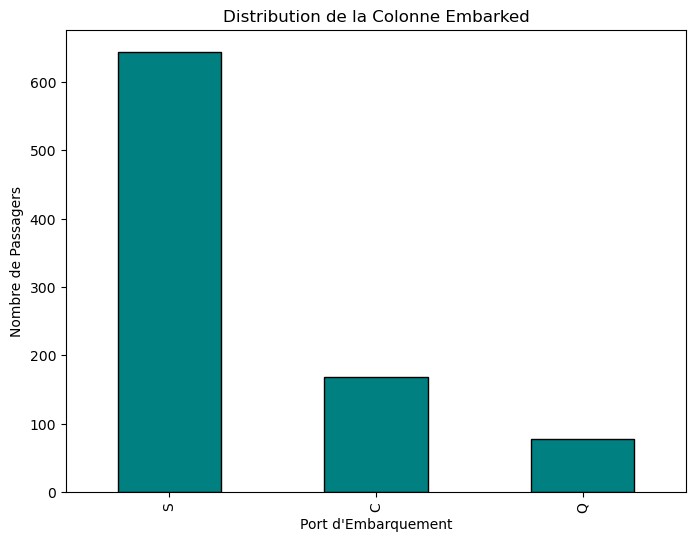

In [9]:
# Calculer la distribution de la colonne 'Embarked'
embarked_distribution = datatrain['Embarked'].value_counts()

# Afficher la distribution
print("Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):")
print(embarked_distribution)

# Calculer la distribution de la colonne 'Embarked'
embarked_distribution = datatrain['Embarked'].value_counts()

# Tracer la distribution de la colonne 'Embarked'
plt.figure(figsize=(8, 6))
embarked_distribution.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Distribution de la Colonne Embarked')
plt.xlabel('Port d\'Embarquement')
plt.ylabel('Nombre de Passagers')
plt.show()

##### Définir les données d’entraînement et de test
- Nous apporterons les modifications suivantes aux données :

- Si « Age » est manquant pour une ligne donnée, nous attribuons 28 (âge médian).
- Si « Embarqué » est manquant pour une ligne donnée, nous attribuons « S » (le plus souvent embarqué).
- Nous ignorerons « Cabine » en tant que variable. Il y a trop de valeurs manquantes, cela n’aurait pas de sens de lui attribuer des valeurs.

In [10]:
# Remplacer les valeurs manquantes dans la colonne 'Age' par 28 (âge médian)
datatrain['Age'].fillna(28, inplace=True)

# Remplacer les valeurs manquantes dans la colonne 'Embarked' par 'S' (le plus souvent embarqué)
datatrain['Embarked'].fillna('S', inplace=True)

# Supprimer la colonne 'Cabin'
datatrain.drop(columns=['Cabin'], inplace=True)

# Afficher les premières lignes du DataFrame pour vérifier les modifications
print(datatrain.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [11]:
# Afficher le nombre de valeurs manquantes pour chaque colonne
missing_values = datatrain.isnull().sum()
print(missing_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


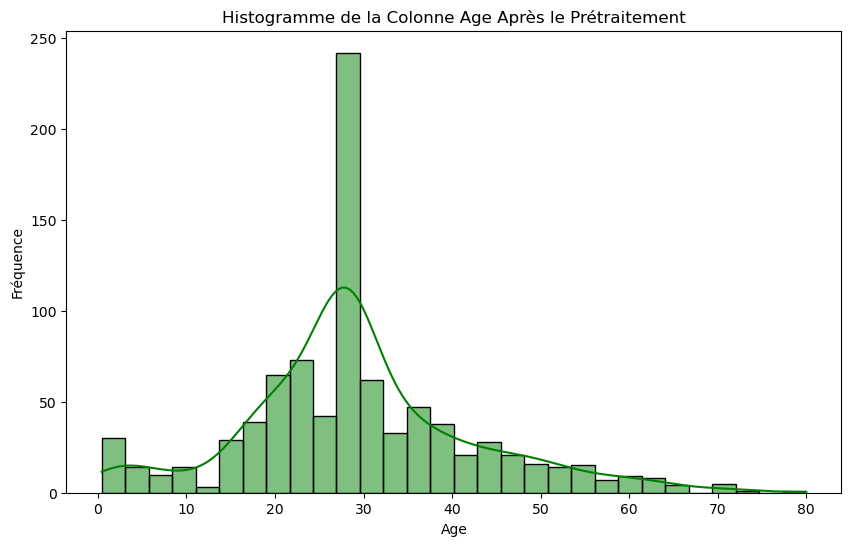

In [12]:
# Tracer l'histogramme de la colonne 'Age' après le prétraitement
plt.figure(figsize=(10, 6))
sns.histplot(datatrain['Age'], kde=True, color='green', bins=30, edgecolor='black')
plt.title('Histogramme de la Colonne Age Après le Prétraitement')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.show()

#### Ingénierie des fonctionnalités 
- Il s’agit d’une variable liée à l’intérieur de notre ensemble de données indiquant 
- si le passager voyage ou non avec sa famille. Par souci de simplicité, nous allons combiner ces variables en une seule variable catégorielle : 
- si cette personne voyageait seule ou non. 

In [13]:
#create the feature 'TravelAlone'

- Pour créer la fonctionnalité TravelAlone qui indique si un passager voyage seul ou non, 
- nous allons combiner les colonnes SibSp (nombre de frères et sœurs/conjoints à bord) et Parch (nombre de parents/enfants à bord). 
- Si la somme de SibSp et Parch est égale à 0, cela signifie que le passager voyage seul. Sinon, il voyage avec sa famille.

In [14]:
# Créer la fonctionnalité 'TravelAlone'
datatrain['TravelAlone'] = (datatrain['SibSp'] + datatrain['Parch'] == 0).astype(int)

# Afficher les premières lignes du DataFrame pour vérifier la nouvelle fonctionnalité
print(datatrain[['SibSp', 'Parch', 'TravelAlone']].head())

   SibSp  Parch  TravelAlone
0      1      0            0
1      1      0            0
2      0      0            1
3      1      0            0
4      0      0            1


In [15]:
# Encoder les fonctionnalités catégorielles
data_encoded = pd.get_dummies(datatrain, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

# Afficher les premières lignes du DataFrame encodé pour vérifier
print(data_encoded.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare  TravelAlone  Pclass_2  \
0  22.0      1      0         A/5 21171   7.2500            0     False   
1  38.0      1      0          PC 17599  71.2833            0     False   
2  26.0      0      0  STON/O2. 3101282   7.9250            1     False   
3  35.0      1      0            113803  53.1000            0     False   
4  35.0      0      0            373450   8.0500            1     False   

   Pclass_3  Sex_male  Embarked_Q  Embarked_S  
0      True      True     

In [16]:
# Supprimer les colonnes dont vous n'avez pas besoin
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
data_encoded.drop(columns=columns_to_drop, inplace=True)

# Afficher les premières lignes du DataFrame pour vérifier les modifications
print(data_encoded.head())


   Survived   Age  SibSp  Parch     Fare  TravelAlone  Pclass_2  Pclass_3  \
0         0  22.0      1      0   7.2500            0     False      True   
1         1  38.0      1      0  71.2833            0     False     False   
2         1  26.0      0      0   7.9250            1     False      True   
3         1  35.0      1      0  53.1000            0     False     False   
4         0  35.0      0      0   8.0500            1     False      True   

   Sex_male  Embarked_Q  Embarked_S  
0      True       False        True  
1     False       False       False  
2     False       False        True  
3     False       False        True  
4      True       False        True  


##### Faites de même avec le jeu de données de test
Une bonne pratique consiste à créer de nouveaux jeux de données ou une copie pour chaque nouvelle opération.

In [17]:

# Afficher le nombre de valeurs manquantes pour chaque colonne
missing_values_test = data_encoded.isnull().sum()
print(missing_values_test)

Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
TravelAlone    0
Pclass_2       0
Pclass_3       0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [18]:
import pandas as pd


# Remplacer les valeurs manquantes dans la colonne 'Age' par 28 (âge médian)
datatest['Age'].fillna(28, inplace=True)

# Remplacer les valeurs manquantes dans la colonne 'Embarked' par 'S' (le plus souvent embarqué)
datatest['Embarked'].fillna('S', inplace=True)

# Supprimer la colonne 'Cabin'
datatest.drop(columns=['Cabin'], inplace=True)

# Créer la fonctionnalité 'TravelAlone'
datatest['TravelAlone'] = (datatest['SibSp'] + datatest['Parch'] == 0).astype(int)

# Encoder les fonctionnalités catégorielles
test_data_encoded = pd.get_dummies(datatest, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

# Supprimer les colonnes dont vous n'avez pas besoin
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
test_data_encoded.drop(columns=columns_to_drop, inplace=True)

# Afficher le nombre de valeurs manquantes pour chaque colonne
missing_values_test = test_data_encoded.isnull().sum()
print(missing_values_test)

Age            0
SibSp          0
Parch          0
Fare           1
TravelAlone    0
Pclass_2       0
Pclass_3       0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


##### Analyse exploratoire des données
Le but de cette partie est de comprendre les données et de voir s’il existe des corrélations entre les variables. Nous utiliserons la bibliothèque seaborn pour rendre nos graphiques plus beaux ages

- Pour afficher la distribution de l'âge et mettre en évidence la variable Survived, 
- nous allons utiliser la bibliothèque seaborn pour créer un graphique KDE (Kernel Density Estimate). 
- Voici comment procéder :

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


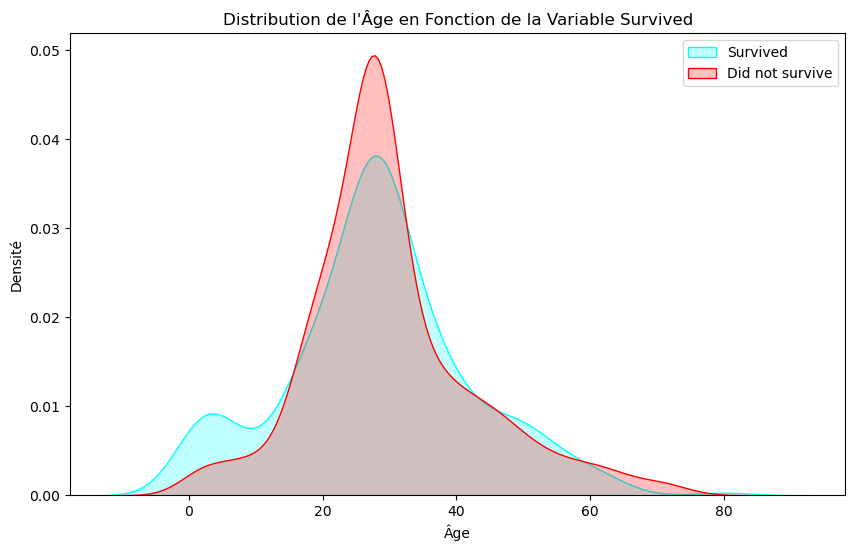

In [19]:
# Tracer la distribution de l'âge avec la variable 'Survived'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=datatrain[datatrain['Survived'] == 1]['Age'], label='Survived', color='cyan', fill=True)
sns.kdeplot(data=datatrain[datatrain['Survived'] == 0]['Age'], label='Did not survive', color='red', fill=True)
plt.title('Distribution de l\'Âge en Fonction de la Variable Survived')
plt.xlabel('Âge')
plt.ylabel('Densité')
plt.legend()
plt.show()


In [20]:
#add the "IsMinor" variable to your data (a person is considered a minor if they are under 16)

In [21]:
# Ajouter la variable 'IsMinor'
datatrain['IsMinor'] = (datatrain['Age'] < 16).astype(int)

# Afficher les premières lignes du DataFrame pour vérifier la nouvelle variable
print(datatrain[['Age', 'IsMinor']].head())


    Age  IsMinor
0  22.0        0
1  38.0        0
2  26.0        0
3  35.0        0
4  35.0        0


##### Classe de passager

##### Calculer la Proportion de Survivants par Classe

In [22]:
# Calculer la proportion de survivants par classe
survival_by_class = datatrain.groupby('Pclass')['Survived'].mean()

# Afficher la proportion de survivants par classe
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


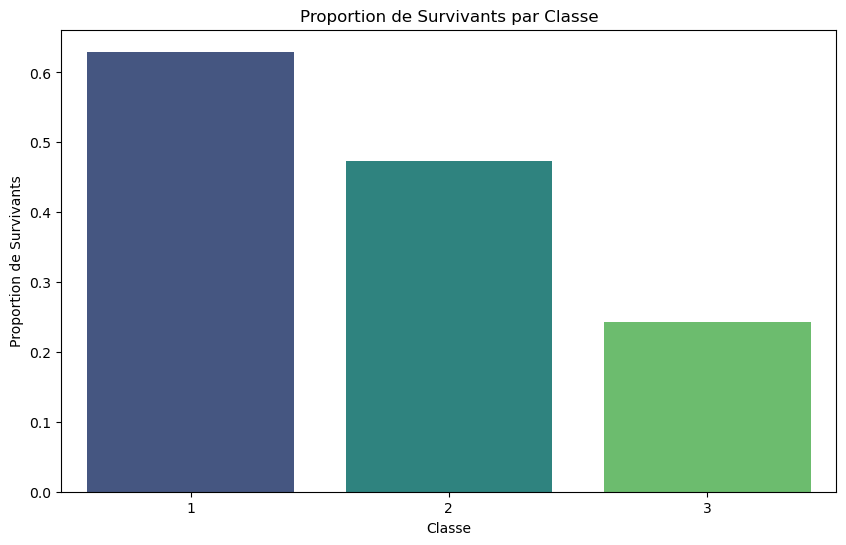

In [23]:
# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='viridis')
plt.title('Proportion de Survivants par Classe')
plt.xlabel('Classe')
plt.ylabel('Proportion de Survivants')
plt.show()

#### Script pour Afficher la Distribution des Passagers par Port d'Embarquement

In [24]:
# Calculer la distribution des passagers par port d'embarquement
embarked_distribution = datatrain['Embarked'].value_counts()

# Afficher la distribution
print("Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):")
print(embarked_distribution)

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


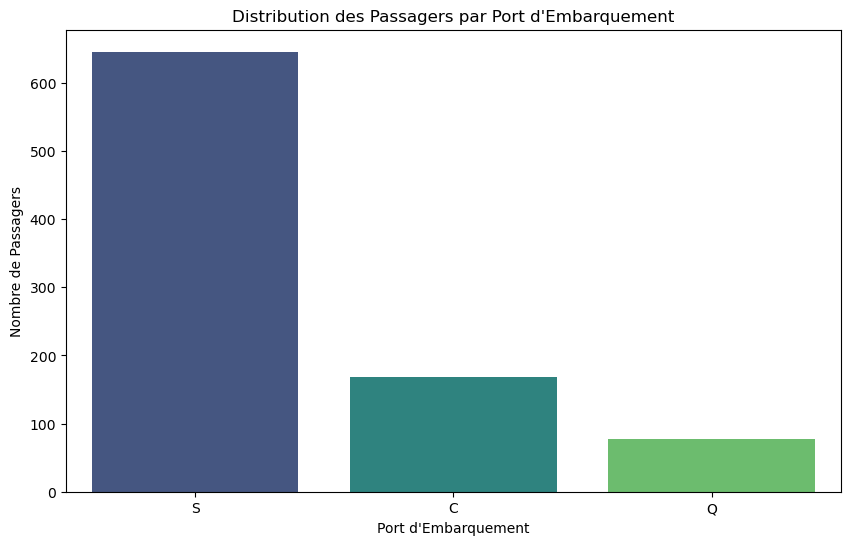

In [25]:
# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=embarked_distribution.index, y=embarked_distribution.values, palette='viridis')
plt.title('Distribution des Passagers par Port d\'Embarquement')
plt.xlabel('Port d\'Embarquement')
plt.ylabel('Nombre de Passagers')
plt.show()

##### Script pour Afficher la Proportion de Survivants en Fonction de la Variable TravelAlone

In [26]:
# Calculer la proportion de survivants en fonction de 'TravelAlone'
survival_by_travel_alone = datatrain.groupby('TravelAlone')['Survived'].mean()

# Afficher la proportion de survivants en fonction de 'TravelAlone'
print(survival_by_travel_alone)

TravelAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64


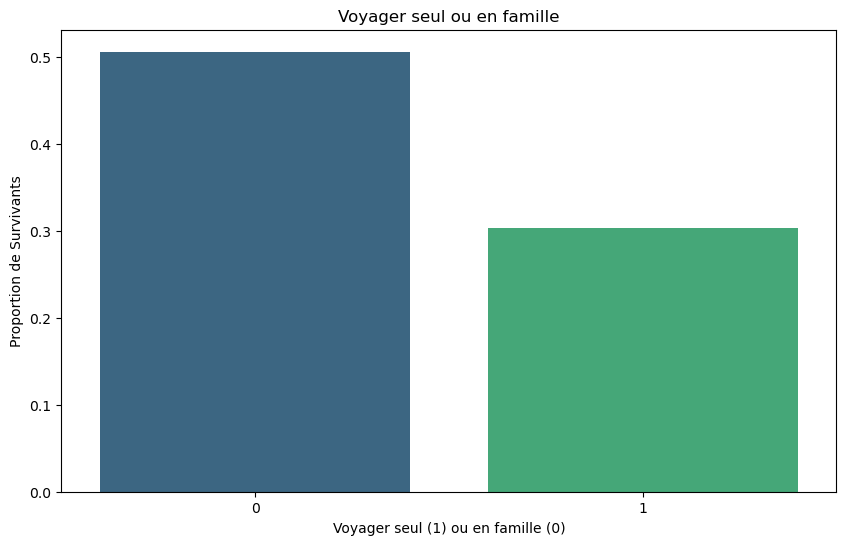

In [27]:
# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_travel_alone.index, y=survival_by_travel_alone.values, palette='viridis')
plt.title('Voyager seul ou en famille')
plt.xlabel('Voyager seul (1) ou en famille (0)')
plt.ylabel('Proportion de Survivants')
plt.show()

##### Script pour Afficher la Distribution des Survivants en Fonction du Genre

In [28]:
# Calculer la proportion de survivants en fonction du genre
survival_by_gender = datatrain.groupby('Sex')['Survived'].mean()

# Afficher la proportion de survivants en fonction du genre
print(survival_by_gender)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


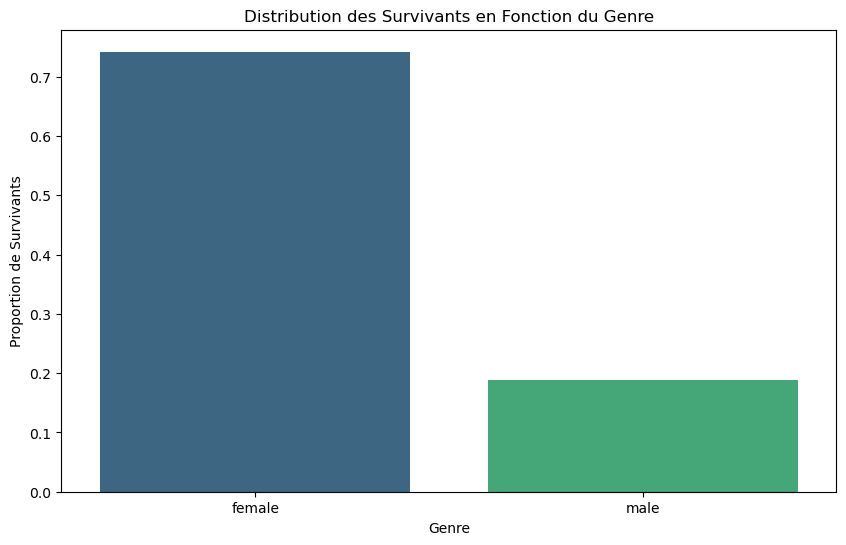

In [29]:
# Tracer le graphique en barres
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values, palette='viridis')
plt.title('Distribution des Survivants en Fonction du Genre')
plt.xlabel('Genre')
plt.ylabel('Proportion de Survivants')
plt.show()

#### Classement des caractéristiques avec élimination récursive des caractéristiques et validation croisée
- RFECV exécute la méthode RFE dans une boucle de validation croisée pour trouver le nombre optimal de variables. 
- La méthode RFECV applique les paramètres sélectionnés dans la validation croisée à la régression logistique.

In [30]:
# Définir les variables indépendantes (X) et la variable dépendante (y)
X = datatrain.drop(columns=['Survived'])
y = datatrain['Survived']

# Afficher les premières lignes de X et y pour vérifier
print(X.head())
print(y.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500        S   
1  female  38.0      1      0          PC 17599  71.2833        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S   
3  female  35.0      1      0            113803  53.1000        S   
4    male  35.0      0      0            373450   8.0500        S   

   TravelAlone  IsMinor  
0            0        0  
1            0        0  
2            1        0  
3            0    

In [31]:
#instanciate a LogisticRegression estimator in sklearn

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# Définir les variables indépendantes (X) et la variable dépendante (y)
X = datatrain.drop(columns=['Survived'])
y = datatrain['Survived']

In [34]:
# Instancier l'estimateur de régression logistique
logreg = LogisticRegression()
# Afficher l'estimateur pour vérifier
print(logreg)

LogisticRegression()


In [35]:
#create a RFE model and select 4 atribute

In [36]:
from sklearn.feature_selection import RFE

In [37]:
# Encoder les colonnes non numériques
data_encoded = pd.get_dummies(datatrain, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [38]:
# Définir les variables indépendantes (X) et la variable dépendante (y)
X = data_encoded.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])
y = data_encoded['Survived']

In [39]:
# Créer le modèle RFE et sélectionner 4 attributs
rfe = RFE(estimator=logreg, n_features_to_select=4)
rfe.fit(X, y)

# Afficher les caractéristiques sélectionnées
selected_features = X.columns[rfe.support_]
print("Selected features:", list(selected_features))

Selected features: ['IsMinor', 'Pclass_2', 'Pclass_3', 'Sex_male']


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [40]:
#create a RFE model and select 8 atribute

In [41]:
# Créer le modèle RFE et sélectionner 8 attributs
rfe = RFE(estimator=logreg, n_features_to_select=8)
rfe.fit(X, y)

# Afficher les caractéristiques sélectionnées
selected_features = X.columns[rfe.support_]
print("Selected features:", list(selected_features))

Selected features: ['SibSp', 'Parch', 'TravelAlone', 'IsMinor', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_S']


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [42]:
#plot features numbers VS. cross-validation scores

In [43]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

In [44]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Créer le modèle RFECV et sélectionner les caractéristiques
rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, y_train)

# Afficher le nombre optimal de caractéristiques
print("Optimal number of features:", rfecv.n_features_)

# Afficher les caractéristiques sélectionnées
selected_features = X.columns[rfecv.support_]
print("Selected features:", list(selected_features))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Optimal number of features: 9
Selected features: ['SibSp', 'Parch', 'TravelAlone', 'IsMinor', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S']


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

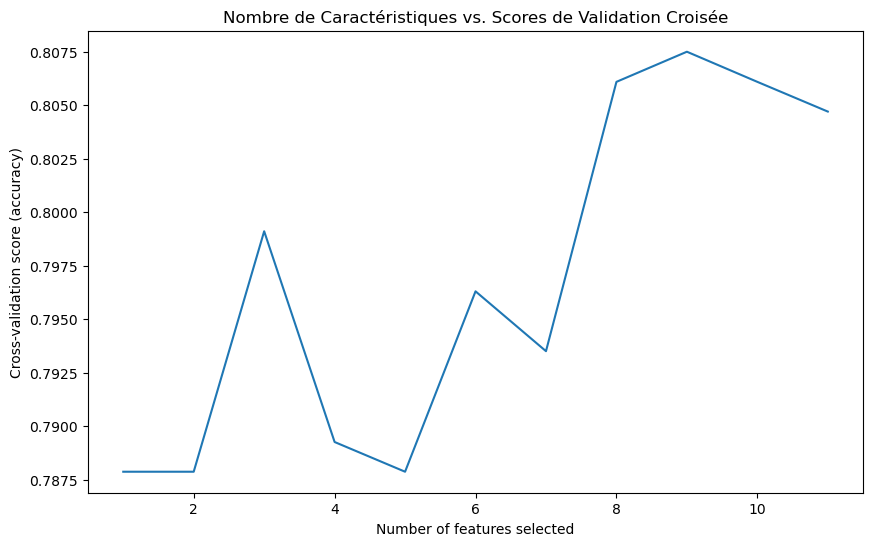

In [46]:
# Tracer le nombre de caractéristiques vs. scores de validation croisée
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("Nombre de Caractéristiques vs. Scores de Validation Croisée")
plt.show()

In [47]:
# Encoder les colonnes non numériques
data_encoded = pd.get_dummies(datatrain, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [48]:
# Définir les caractéristiques sélectionnées
selected_features = ['Age', 'TravelAlone', 'Pclass_3', 'Pclass_2', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor']

In [49]:
# Créer le nouveau DataFrame avec les caractéristiques sélectionnées
X_new = data_encoded[selected_features]
y = data_encoded['Survived']

In [50]:
# Afficher la forme du nouveau DataFrame et de la variable dépendante
print(X_new.shape, y.shape)

(891, 8) (891,)


In [51]:
#split your data with an alpha=20% and a random_state=42

In [52]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Afficher la forme des ensembles d'entraînement et de test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [53]:
#instantiate a LogisticRegression estimator and fit it on your data

In [54]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [55]:
# Instancier l'estimateur de régression logistique
logreg = LogisticRegression()

# Ajuster l'estimateur sur les données d'entraînement
logreg.fit(X_train, y_train)


LogisticRegression()

In [56]:
# Faire une prédiction sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Afficher les prédictions
print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [57]:
# Faire une prédiction avec la fonction predict_proba
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
y_pred = logreg.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [63]:
# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)

# Calculer la perte d'entropie croisée
cross_entropy = log_loss(y_test, y_pred_proba)

# Calculer l'AUC
auc = roc_auc_score(y_test, y_pred_proba)

In [64]:
# Afficher les métriques de performance
print("Accuracy of the model:", accuracy)
print("Cross-entropy loss:", cross_entropy)
print("AUC:", auc)

Accuracy of the model: 0.7932960893854749
Cross-entropy loss: 0.4330191658139548
AUC: 0.8716216216216216


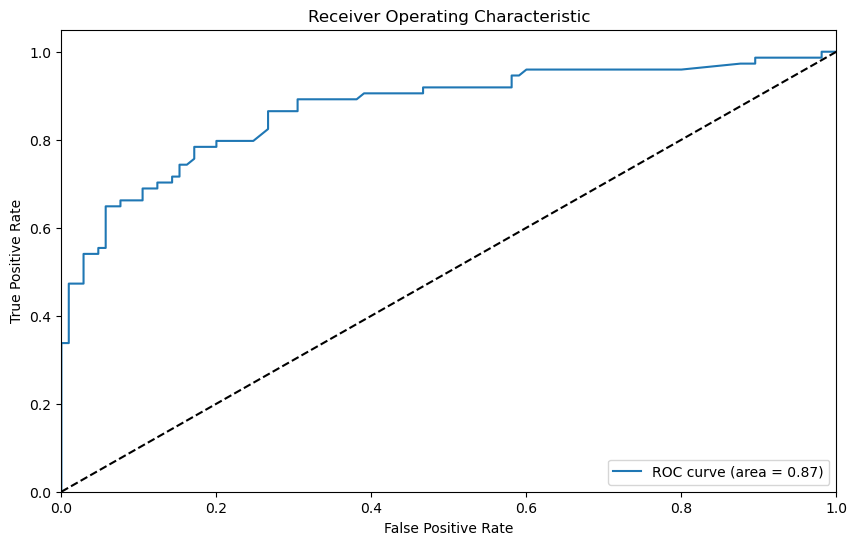

In [65]:
# Tracer la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [66]:
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Afficher le rapport de classification
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[89 16]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

